<a href="https://colab.research.google.com/github/agolbeny/Machine-Deep-Learning-Projects/blob/main/PredictedSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
# loading the mnist data from keras.datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
# shape of the numpy array
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
# taining data = 60000 images
# test data = 10000 images
# image dimension => 28 * 28
# grayscale image => 1 channel 


In [6]:
# printing the 10th index
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(x_train[10].shape)

(28, 28)


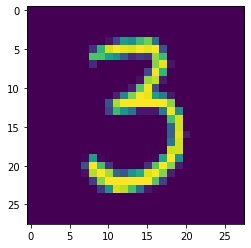

3


In [8]:
# displaying the image
plt.imshow(x_train[50])
plt.show()

# print the corresponding label
print(y_train[50])

In [9]:
# image labels
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [10]:
# unique values in y train
print(np.unique(y_train))


# unique values in y test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
# we can use this labels as such or we can also apply one hot encoding
# all the images have the same dimension in this dataset, if not we have to resize all the images to a common dimension



In [12]:
# scaling the values
x_train = x_train/255
x_test = x_test/255

In [13]:
# printing the 10th images
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
# Building the NN 
# setting up the layers of the NN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [15]:
# compiling the NN
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [16]:
# Training the NN
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0836 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0683 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0601 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0452 - accuracy: 0.9863
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0403 - accuracy: 0.9865
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.034

In [17]:
# Training data accuracy = 98.8%


In [18]:
# accuracy on test data:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1051 - accuracy: 0.9699
0.9699000120162964


In [19]:
# my test data accuracy = 96.9%

In [20]:
print(x_test.shape)

(10000, 28, 28)


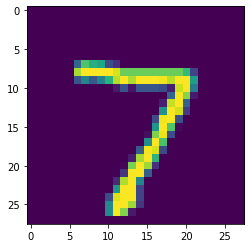

In [21]:
# first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [22]:
print(y_test[0])

7


In [23]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [24]:
print(y_pred.shape)

(10000, 10)


In [25]:
print(y_pred[0])

[1.4374391e-03 7.1467441e-01 6.1776555e-01 6.3362604e-01 1.2592117e-04
 8.9226983e-04 1.1089677e-08 9.9999857e-01 9.5946109e-03 6.5481454e-02]


In [26]:
# model.predict() gives the prediction probability of each class for that data point


In [27]:
# converting the prediction probabilities to class label
label_for_first_image = np.argmax(y_pred[0])

In [28]:
print(label_for_first_image)

7


In [29]:
# converting the prediction probability to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
# y test is my True labels, and Y pred labes represent my predicted labels'


In [31]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [32]:
print(conf_mat)

tf.Tensor(
[[ 969    1    0    1    1    1    2    2    3    0]
 [   0 1122    0    3    0    3    2    1    4    0]
 [   5    1  983    7    8    2    5    8   13    0]
 [   0    0    2  972    0   25    0    3    4    4]
 [   1    0    2    0  965    3    5    1    1    4]
 [   2    0    0    4    1  879    3    1    2    0]
 [   5    3    0    1    4   10  932    0    3    0]
 [   1    7    6    1    5    0    0  995    7    6]
 [   2    0    1    6    4   14    2    3  939    3]
 [   2    4    0    6   26   11    2    6    9  943]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

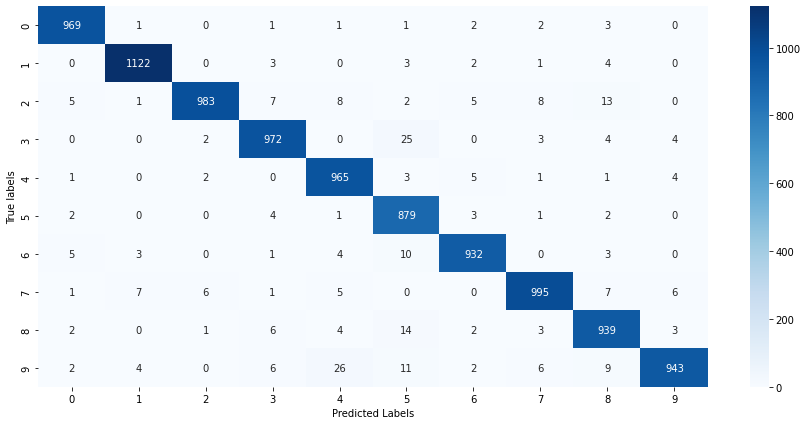

In [34]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted Labels')

In [36]:
# building a prediction system
input_image_path = '/content/3.jpg'
input_image = cv2.imread(input_image_path)

In [37]:
type(input_image)

numpy.ndarray

In [38]:
print(input_image)

[[[235 237 237]
  [236 238 238]
  [236 238 238]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 [[237 239 239]
  [237 239 239]
  [237 239 239]
  ...
  [243 243 243]
  [241 241 241]
  [241 241 241]]

 [[238 240 240]
  [238 240 240]
  [238 240 240]
  ...
  [242 242 242]
  [241 241 241]
  [241 241 241]]

 ...

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


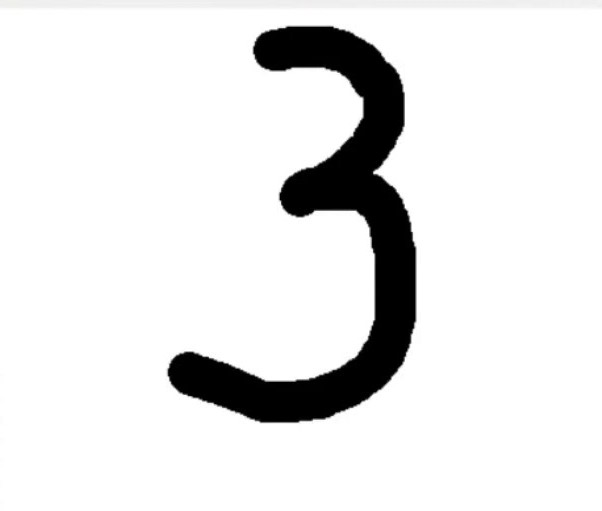

In [39]:
cv2_imshow(input_image)

In [40]:
input_image.shape

(511, 602, 3)

In [41]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [42]:
grayscale.shape

(511, 602)

In [43]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [44]:
input_image_resize.shape

(28, 28)

In [45]:
cv2_imshow(input_image_resize)

In [46]:
input_image_resize = input_image_resize/255

In [48]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [49]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 72ms/step
[[2.0791515e-12 4.0235883e-01 9.9952275e-01 9.9989444e-01 4.8368810e-32
  1.0000000e+00 9.4161338e-01 9.7367090e-01 1.6163624e-04 7.0570998e-20]]


In [50]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

5


Path of the image to the predicted: /content/3as.jpg


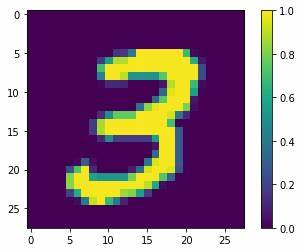

1/1 [==============================] - 0s 23ms/step
The Handwritten Digit is recognised as:  3


In [56]:
# Predictive system
input_image_path = input('Path of the image to the predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognised as: ', input_pred_label)